In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
# from imblearn.over_sampling import SMOTE
import seaborn as sns
import numpy as np


data

In [2]:
data = pd.read_csv('wilson.csv')

In [3]:
data.isnull().sum()

Name                                   0
Age                                    0
Sex                                    0
Ceruloplasmin Level                 6025
Copper in Blood Serum               6131
Free Copper in Blood Serum          5933
Copper in Urine                     6033
ALT                                 6111
AST                                 5862
Total Bilirubin                     5880
Albumin                             5977
Alkaline Phosphatase (ALP)          6065
Prothrombin Time / INR              6017
Gamma-Glutamyl Transferase (GGT)    5935
Kayser-Fleischer Rings                 0
Neurological Symptoms Score         6119
Psychiatric Symptoms                   0
Cognitive Function Score            5948
Family History                         0
ATB7B Gene Mutation                    0
Region                                 0
Socioeconomic Status                   0
Alcohol Use                            0
BMI                                    0
Is_Wilson_Diseas

In [4]:
data.interpolate(axis=0,limit_direction='both',inplace=True) #melgade mathe kelgade du nobittu null value fill madutte

C:\Users\mythr\AppData\Local\Temp\ipykernel_11292\1493366836.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(axis=0,limit_direction='both',inplace=True) #melgade mathe kelgade du nobittu null value fill madutte


In [5]:
data.dtypes

Name                                 object
Age                                   int64
Sex                                  object
Ceruloplasmin Level                 float64
Copper in Blood Serum               float64
Free Copper in Blood Serum          float64
Copper in Urine                     float64
ALT                                 float64
AST                                 float64
Total Bilirubin                     float64
Albumin                             float64
Alkaline Phosphatase (ALP)          float64
Prothrombin Time / INR              float64
Gamma-Glutamyl Transferase (GGT)    float64
Kayser-Fleischer Rings                int64
Neurological Symptoms Score         float64
Psychiatric Symptoms                  int64
Cognitive Function Score            float64
Family History                        int64
ATB7B Gene Mutation                   int64
Region                               object
Socioeconomic Status                 object
Alcohol Use                     

In [6]:
data.value_counts()

Name                Age  Sex     Ceruloplasmin Level  Copper in Blood Serum  Free Copper in Blood Serum  Copper in Urine  ALT        AST        Total Bilirubin  Albumin   Alkaline Phosphatase (ALP)  Prothrombin Time / INR  Gamma-Glutamyl Transferase (GGT)  Kayser-Fleischer Rings  Neurological Symptoms Score  Psychiatric Symptoms  Cognitive Function Score  Family History  ATB7B Gene Mutation  Region  Socioeconomic Status  Alcohol Use  BMI        Is_Wilson_Disease
Zachary Washington  52   Male    32.051506            103.643977             11.269761                   84.111051        70.244983  23.807118  2.732908         4.353673  97.457036                   1.101484                111.622115                        0                       2.259739                     0                     82.058590                 1               0                    East    Low                   False        30.485013  0                    1
Zachary Walters     57   Male    19.809602            114.561

In [7]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Socioeconomic Status'] = label_encoder.fit_transform(data['Socioeconomic Status'])
data['Alcohol Use'] = label_encoder.fit_transform(data['Alcohol Use'])

In [8]:
scaler = StandardScaler()
numerical_features = ['Age', 'Ceruloplasmin Level', 'Copper in Blood Serum', 'Free Copper in Blood Serum', 
                      'Copper in Urine', 'ALT', 'AST', 'Total Bilirubin', 'Albumin', 'Alkaline Phosphatase (ALP)', 
                      'Prothrombin Time / INR', 'Gamma-Glutamyl Transferase (GGT)', 'Neurological Symptoms Score', 
                      'Psychiatric Symptoms', 'Cognitive Function Score', 'BMI']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.drop('Name',axis=1,inplace=True)
# Split the data
X = data.drop('Is_Wilson_Disease', axis=1)
y = data['Is_Wilson_Disease']


In [9]:
data[data['Is_Wilson_Disease']==0]

,Age,Sex,Ceruloplasmin Level,Copper in Blood Serum,Free Copper in Blood Serum,Copper in Urine,ALT,AST,Total Bilirubin,Albumin,...,Neurological Symptoms Score,Psychiatric Symptoms,Cognitive Function Score,Family History,ATB7B Gene Mutation,Region,Socioeconomic Status,Alcohol Use,BMI,Is_Wilson_Disease
20000,0.818097,0,-1.361901,-1.051347,0.123163,-0.726677,-1.185148,-0.505747,-1.181496,-0.808019,...,-0.144649,0.995576,-0.213776,1,0,0,2,0,1.033341,0
20001,-0.097251,0,-0.765600,0.015068,0.790154,-0.278623,-1.905816,0.612292,-1.136413,-0.006477,...,-0.626986,-1.004443,0.271965,1,0,2,1,0,-0.647254,0
20002,0.602721,1,-0.309218,-0.099692,0.101573,0.057385,-0.457993,-0.396590,-0.691804,0.813355,...,-0.089646,0.995576,0.757707,1,0,1,2,0,1.612904,0
20003,0.171969,0,0.147164,-0.704357,-0.587007,-0.415140,-0.964760,-0.943085,0.287296,1.497763,...,-0.488881,-1.004443,0.541911,0,0,3,0,0,0.134704,0
20004,1.087317,1,-0.277614,-1.011812,0.106063,-0.961402,0.512283,-0.754407,-1.403059,-0.647570,...,0.605395,0.995576,0.916993,0,0,2,1,0,-1.621312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.441189,1,0.461193,-0.586164,-2.127326,-0.557176,0.153277,-1.152732,-0.662275,0.377199,...,0.462344,0.995576,0.057916,0,0,3,0,0,0.455116,0
59996,0.495033,0,0.259480,-1.045397,-0.149572,-0.975796,0.431943,1.440009,-0.564806,-0.951910,...,-0.395494,0.995576,0.028868,0,0,3,0,1,0.881909,0
59997,1.356536,0,0.546848,-1.504630,-0.481005,-1.640613,0.506679,-1.371794,0.460285,-1.330702,...,-0.350326,0.995576,0.310392,0,0,3,2,1,-0.134748,0
59998,1.141161,0,0.693946,-0.971885,0.707853,-0.917581,0.744464,-0.502768,-0.572274,-0.644234,...,-0.577224,0.995576,0.591916,0,0,3,2,0,1.078164,0


In [10]:
data.head( )

,Age,Sex,Ceruloplasmin Level,Copper in Blood Serum,Free Copper in Blood Serum,Copper in Urine,ALT,AST,Total Bilirubin,Albumin,...,Neurological Symptoms Score,Psychiatric Symptoms,Cognitive Function Score,Family History,ATB7B Gene Mutation,Region,Socioeconomic Status,Alcohol Use,BMI,Is_Wilson_Disease
0,-1.551039,0,-1.167502,0.955878,0.236067,0.939818,1.423457,1.321788,-0.486535,-1.163688,...,1.045229,0.995576,1.858906,1,1,3,1,0,-0.599493,1
1,-1.174131,0,-1.197987,0.607551,0.236067,-0.020843,-1.090475,1.086502,-1.981239,0.438563,...,1.605731,-1.004443,1.858906,1,1,2,2,0,0.712230,1
2,-0.635691,1,-1.099699,1.419267,-0.129022,1.132683,-0.037802,1.562542,2.556673,2.040814,...,0.719582,0.995576,-1.939921,1,1,3,0,1,-0.439298,1
3,-1.281819,1,-0.759082,0.859940,-2.190181,1.282587,0.367397,2.947154,-0.161331,0.859281,...,0.263831,0.995576,-0.820756,1,1,3,0,0,1.577841,1
4,-0.689535,0,-1.142264,0.969240,1.729423,0.468906,1.127179,1.852641,3.052419,-0.080005,...,0.887124,-1.004443,-1.755924,1,1,0,1,1,0.596978,1


In [11]:
print(data.iloc[20001]['Age'])
print(data.iloc[20001]['Copper in Urine'])
print(data.iloc[20001]['Copper in Blood Serum'])
print(data.iloc[20001]['Ceruloplasmin Level'])
print(data.iloc[20001]['ATB7B Gene Mutation'])
print(data.iloc[20001]['Kayser-Fleischer Rings'])
print(data.iloc[20001]['Neurological Symptoms Score'])
print(data.iloc[20001]['AST'])
print(data.iloc[20001]['Cognitive Function Score'])
print(data.iloc[20001]['ALT'])

-0.09725121789291359
-0.27862329978274275
0.015068075829824086
-0.7656000740109069
0.0
0.0
-0.6269858142353957
0.6122924563755894
0.27196520333948526
-1.9058157181163113


In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
important_features = feature_importance.sort_values(ascending=False).head(10)


In [13]:

# Use top features
X = X[important_features.index]

# Add noise to important features
#ond ond feature guve ond ond noise kodbekagatte
#ivag aadre after scaling madidre, elladakku onde kodbahudu 
noise_level = 1.1
for col in important_features.index:
    X[col] += np.random.normal(0, noise_level, size=X[col].shape)



Accuracy: 0.95275
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8037
           1       0.94      0.92      0.93      3963

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.95     12000
weighted avg       0.95      0.95      0.95     12000

Cross-Validation Accuracy: 0.9550666666666666


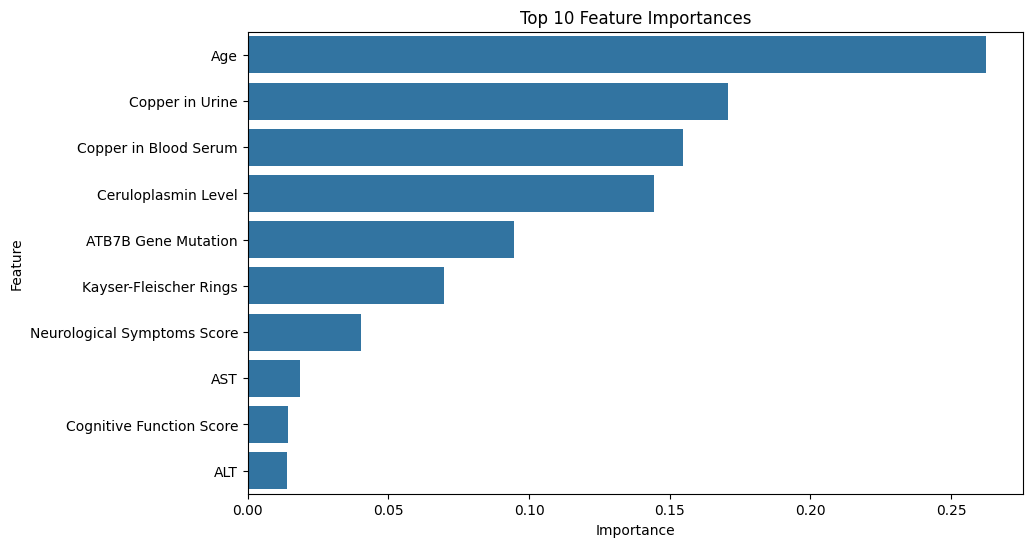

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores)}")

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features.values, y=important_features.index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [15]:
#out of 60k, 45k alli you have substitute maadidini soo NaN values fill aagiradu some mean athva something,
#and then you have scaled the data, and then you have used the top 10 features and added noise to it

In [21]:
from joblib import load, dump
model = load("wilson_model_weights_new.joblib")
dump(model, "wilson_model_weights_new.joblib")


['wilson_model_weights_new.joblib']

In [17]:
X.describe()

,Age,Copper in Urine,Copper in Blood Serum,Ceruloplasmin Level,ATB7B Gene Mutation,Kayser-Fleischer Rings,Neurological Symptoms Score,AST,Cognitive Function Score,ALT
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.003788,-0.000944,-0.002459,-0.004607,0.250020,0.249747,-0.006209,-0.004516,0.008364,-0.002433
std,1.491571,1.489331,1.486595,1.484446,1.185615,1.185334,1.489811,1.482618,1.484450,1.485805
min,-5.973175,-5.377171,-5.334968,-5.752907,-4.849079,-4.610386,-5.266922,-5.817597,-7.799365,-5.988229
25%,-1.010016,-1.046075,-1.050332,-1.046820,-0.552768,-0.553259,-1.034710,-1.017197,-0.930679,-1.012311
50%,0.058464,-0.050614,-0.073315,-0.018325,0.234340,0.234395,-0.092024,-0.035925,0.045076,-0.039840
75%,1.055165,0.998029,0.994656,1.017658,1.044725,1.038721,0.937021,0.967124,0.999837,0.973684
max,5.369387,5.903640,6.319967,5.610850,5.250823,5.780164,7.256268,7.533368,8.635061,7.769688


In [18]:
import gradio as gr
from joblib import load
import numpy as np

# Load the saved model
model = load("wilson_model_weights.joblib")

# Define feature names
feature_names = important_features.index.tolist()

# Define min and max values for sliders (adjust as necessary for your dataset)
slider_ranges = {
    feature: (-2, 2)  # Default range; modify based on scaled feature ranges
    for feature in feature_names
}

# Prediction function
def predict_wilson_disease(*features):
    input_data = np.array(features).reshape(1, -1)
    prediction = model.predict(input_data)[0]
    return "Wilson Disease Positive" if prediction == 1 else "Wilson Disease Negative"

# Gradio interface
inputs = [
    gr.Slider(
        minimum=slider_ranges[feature][0],
        maximum=slider_ranges[feature][1],
        step=0.1,  # Adjust step size if needed
        label=feature,
    )
    for feature in feature_names
]
outputs = gr.Textbox(label="Prediction")

gr_interface = gr.Interface(
    fn=predict_wilson_disease,
    inputs=inputs,
    outputs=outputs,
    title="Wilson Disease Prediction",
    description="Provide values for the top 10 important features to predict Wilson Disease.",
)

# Launch the Gradio app
gr_interface.launch(server_name='0.0.0.0',server_port=5000,share=True)


c:\Users\mythr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://0.0.0.0:5000
* Running on public URL: https://0e7e5d918c9750f5ce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [19]:
!pip install gradio

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)


Model: Logistic Regression
Accuracy: 0.9561
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8037
           1       0.94      0.93      0.93      3963

    accuracy                           0.96     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.96      0.96      0.96     12000

Confusion Matrix:
[[7800  237]
 [ 290 3673]]
Model: Random Forest
Accuracy: 0.9513
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8037
           1       0.93      0.92      0.93      3963

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.94     12000
weighted avg       0.95      0.95      0.95     12000

Confusion Matrix:
[[7783  254]
 [ 330 3633]]
Model: SVM
Accuracy: 0.9574
Classification Report:
              precision    recall  f1-score   support

           0       0.9